# Analysis of Data Related to European Football Leagues

# Introduction

Football is believed to have originated in China in the third century BC. It is the world’s most popular ball game in numbers of players and spectators. Football, is a game in which two teams of 11 players, use any part of their bodies except their hands and arms to maneuver the ball into the opposing team’s goal. Only the goalkeeper is permitted to use his hands and may do so only within the penalty area surrounding the goal. The team that scores the most goals wins. The standard length of a game is 90 minutes with a short break, known as "half time," at the 45-minute mark. Football’s governing body is the Fédération Internationale de Football Association (FIFA). Only America and Canada call the sport soccer. 

# Goals

In this report, I analyze the data of the Ultimate 25k+ Matches Football Database (European) from Kaggle to determine if there are ways to gain an advantage in predicting the outcome of a game for purposes of betting.

# Technical Requirements

1. Perform Data cleaning, exploratory data analysis and feature engineering.
2. Use parameters that gives the most important statistical insights of the data.
3. Create visualizations.
4. Perform statistical inferences and hypothesis testing. Set appropriate significance levels and create confidence intervals for the variables of interest.
5. Apply linear machine learning models and use them for forecasting. 
6. Use cross validation, information criteria, and other methods to specify correct modeling.
7. Choose and use appropriate metrics to measure models' performances.
8. Provide clear explanations. 
9. Provide conclusions and suggest how the analysis can be improved.

# Standards

Below is a summary of the standards I followed to create this report. 

>* **Standard 1:** In the matches table, 11 players from each team are listed. I assumed that these 11 players are the only players that participated in the specific game, although this is highly unlikely. 
>* **Standard 2:** I changed all column headers to follow the specific format of capitalizing the first letter of each word and connecting the words without underscore, like this example: "CountryID". 
>* **Standard 3:** If a column contained more than 75% missing data, I eliminated that column from the table.
>* **Standard 4:** To keep the data as conscise as possible, I dropped any column that I deemed unnecessary or useful to achieve the goals of this report. 

# Biases

Below are the biases I identified while creating this report.

>* **Bias 1:** Clear information about players in each team is not part of this data set. This may be because the players can change at any moment in the game and this information is not entered. 
>* **Bias 2:** I have no expertise in football. There may be parts of the data that I have overlooked that may have been most important and I may have given importance to parts of the data that may have had little significance. 

# Libraries

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
import xml.etree.ElementTree as ET
import eli5 as eli

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from xml.etree.ElementTree import fromstring, ElementTree
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.svm import SVC
from eli5.sklearn import PermutationImportance
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV


# Display Parameters

## Display Features

In [2]:
%matplotlib inline
pd.options.display.max_rows = 300000
pd.options.display.max_columns = 999
pd.options.display.max_colwidth = 500
warnings.filterwarnings("ignore")

## Colors

In [3]:
color_1 = "bisque"
color_2 = "crimson"
color_3 = "orangered"
color_4 = "lightcoral"
color_5 = "royalblue"
color_6 = "pink"
color_7 = "indianred"
color_8 = "slategrey"
color_9 = "salmon"
color_10 = "beige"
color_11 = "coral"
color_13 = "grey"
color_14 = "tan"
color_15 = "wheat"
color_16 = "tomato"

## Figure Parameters

In [4]:
size = 20

params = {
    "font.family": "Times New Roman",
    "font.size": size,
    "axes.labelsize": size,
    "xtick.labelsize": size * 0.75,
    "ytick.labelsize": size * 0.75,
    "figure.titlesize": size * 1.5,
    "axes.titlesize": size * 1.5,
    "axes.titlepad": size,
    "axes.labelpad": size - 10,
    "lines.linewidth": 2,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.spines.left": False,
    "axes.spines.bottom": False,
    "legend.fontsize": size,
}

# The Raw Data

For this report, I used the Ultimate 25k+ Matches Football Database - European dataset from Kaggle. This data set is comprised of seven (7) tables.
1. Country
2. Leauge
3. Player
4. Plater Attribute
5. Team
6. Team Attribute
7. Match

In [5]:
football = sqlite3.connect(
    "C:\\Users\\Space\\Documents\\py\\Projects\\TuringCollege\\Football\\database.sqlite"
)

In [6]:
football_db = {}

result = football.execute("SELECT name FROM sqlite_master WHERE type='table';")

for table in result:
    query = "SELECT * from " + str(table[0]) + ";"
    football_db[table[0]] = pd.read_sql_query(query, football)

# Data Overview and Cleaning

In this section, I provide and overview of the data and clean the data to be used at later parts of this analysis.

## Country

The section below contains information about the Country table and how I cleaned this table for further analysis.

In [7]:
country = football_db["Country"].copy()

In [8]:
country.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [9]:
country.rename(columns={"id": "CountryID", "name": "CountryName"}, inplace=True)

In [10]:
country

,CountryID,CountryName
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [11]:
country.shape

(11, 2)

### Section Summary
> * Eleven (11) countries are represented in this data set. 
> * I changed the headers to conform with Standard 2 from the Standards Section mentioned above.  

## League

The section below contains information about the League table and how I cleaned this table for further analysis.

In [12]:
league = football_db["League"].copy()

In [13]:
league.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [14]:
del league["id"]
league = league.rename(columns={"country_id": "LeagueID", "name": "LeagueName"})

In [15]:
league.head()

,LeagueID,LeagueName
0,1,Belgium Jupiler League
1,1729,England Premier League
2,4769,France Ligue 1
3,7809,Germany 1. Bundesliga
4,10257,Italy Serie A


In [16]:
league.shape

(11, 2)

### Section Summary
> * Eleven (11) leagues are represented in this data set, one from each country specified in the Country table. 
> * Conforming with the Standard 4 of the Standards Section mentioned above, I dropped the "id" column. 
> * I changed the headers to conform with Standard 2 from the Standards Section mentioned above.  

## Player

The section below contains information about the Player table and how I cleaned this table for further analysis.

In [17]:
player = football_db["Player"].copy()

In [18]:
player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [19]:
player[player.duplicated()].sum()

id                    0.0
player_api_id         0.0
player_name           0.0
player_fifa_api_id    0.0
birthday              0.0
height                0.0
weight                0.0
dtype: float64

In [20]:
player.isna().sum()

id                    0
player_api_id         0
player_name           0
player_fifa_api_id    0
birthday              0
height                0
weight                0
dtype: int64

In [21]:
player.drop(columns=["id", "player_fifa_api_id"], inplace=True)
player = player.set_index("player_api_id")
player = player.rename_axis("player_api_id").reset_index()

In [22]:
player.rename(
    columns={
        "player_api_id": "PlayerID",
        "player_name": "PlayerName",
        "birthday": "Birthday",
        "height": "Height",
        "weight": "Weight",
    },
    inplace=True,
)

In [23]:
player["Birthday"] = pd.DatetimeIndex(player["Birthday"]).year

In [24]:
player.head()

,PlayerID,PlayerName,Birthday,Height,Weight
0,505942,Aaron Appindangoye,1992,182.88,187
1,155782,Aaron Cresswell,1989,170.18,146
2,162549,Aaron Doran,1991,170.18,163
3,30572,Aaron Galindo,1982,182.88,198
4,23780,Aaron Hughes,1979,182.88,154


In [25]:
player.shape

(11060, 5)

### Section Summary
> * This table contains no duplicates.
> * This table contains no  missing data.
> * Conforming with Standard 2 from the Standards Section mentioned above, I eliminated these columns from the Player table: "id", "player_fifa_api_id". 
> * I changed the headers to conform with Standard 2 from the Standards Section mentioned above.  
> * I modified the player's birthday to show only the year.

## Player Attributes

The section below contains information about the Player Attributes table and how I cleaned this table for further analysis.

In [26]:
player_attributes = football_db["Player_Attributes"].copy()

In [27]:
player_attributes.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [28]:
player_attributes.shape

(183978, 42)

In [29]:
player_attributes[player_attributes.duplicated()].sum()

id                     0.0
player_fifa_api_id     0.0
player_api_id          0.0
date                   0.0
overall_rating         0.0
potential              0.0
preferred_foot         0.0
attacking_work_rate    0.0
defensive_work_rate    0.0
crossing               0.0
finishing              0.0
heading_accuracy       0.0
short_passing          0.0
volleys                0.0
dribbling              0.0
curve                  0.0
free_kick_accuracy     0.0
long_passing           0.0
ball_control           0.0
acceleration           0.0
sprint_speed           0.0
agility                0.0
reactions              0.0
balance                0.0
shot_power             0.0
jumping                0.0
stamina                0.0
strength               0.0
long_shots             0.0
aggression             0.0
interceptions          0.0
positioning            0.0
vision                 0.0
penalties              0.0
marking                0.0
standing_tackle        0.0
sliding_tackle         0.0
g

In [30]:
player_attributes.isna().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [31]:
player_attributes.shape

(183978, 42)

In [32]:
null_instances = player_attributes[
    player_attributes["attacking_work_rate"].isnull()
].index
player_attributes.drop(null_instances, inplace=True)

In [33]:
null_instances = player_attributes[player_attributes["volleys"].isnull()].index
player_attributes.drop(null_instances, inplace=True)

In [34]:
player_attributes.shape

(180354, 42)

In [35]:
player_attributes.isna().sum()

id                     0
player_fifa_api_id     0
player_api_id          0
date                   0
overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0


In [36]:
player_attributes.shape

(180354, 42)

In [37]:
player_attributes.drop(
    columns=[
        "id",
        "player_fifa_api_id",
        "gk_diving",
        "gk_handling",
        "gk_kicking",
        "gk_positioning",
        "gk_reflexes",
    ],
    inplace=True,
)

In [38]:
def break_ties(col: str):
    most_common = pd.Series.mode(col)

    if len(most_common) > 1:
        return most_common[0]
    else:
        return most_common

In [39]:
players_categorical = (
    player_attributes.groupby(["player_api_id", "date"])[
        ["preferred_foot", "attacking_work_rate", "defensive_work_rate"]
    ]
    .agg(lambda x: break_ties(x))
    .reset_index()
)

In [40]:
players_numerical = (
    player_attributes.groupby(["player_api_id", "date"])
    .agg("mean", numeric_only=True)
    .reset_index()
)

In [41]:
player_attributes = pd.merge(
    players_categorical,
    players_numerical,
    on=["player_api_id", "date"],
    how="inner",
)

In [42]:
player_attributes.attacking_work_rate.unique()

array(['high', 'medium', 'None', 'low', 'norm', 'stoc', 'le', 'y'],
      dtype=object)

In [43]:
player_attributes.defensive_work_rate.unique()

array(['medium', 'low', '7', 'high', 'o', 'ormal', '4', 'tocky', '2', '9',
       '6', '3', 'ean', '1', '5', 'es', '0', '8'], dtype=object)

In [44]:
player_attributes["attacking_work_rate"].replace(
    ["norm", "stoc", "le", "y"], "None", inplace=True
)
player_attributes["defensive_work_rate"].replace(
    [
        "7",
        "o",
        "ormal",
        "4",
        "tocky",
        "2",
        "9",
        "6",
        "3",
        "ean",
        "1",
        "5",
        "es",
        "0",
        "8",
    ],
    "None",
    inplace=True,
)

In [45]:
player_attributes.rename(
    columns={
        "player_api_id": "PlayerID",
        "date": "Date",
        "overall_rating": "OverallRating",
        "potential": "Potential",
        "preferred_foot": "PreferredFoot",
        "attacking_work_rate": "AttackWorkRate",
        "defensive_work_rate": "DefenceWorkRate",
        "crossing": "Crossing",
        "finishing": "Finishing",
        "heading_accuracy": "HeadingAccuracy",
        "short_passing": "ShortPassing",
        "volleys": "Volleys",
        "dribbling": "Dribbling",
        "curve": "Curve",
        "free_kick_accuracy": "FreeKickAccuracy",
        "long_passing": "LongPassing",
        "ball_control": "BallControl",
        "acceleration": "Acceleration",
        "sprint_speed": "SprintSpeed",
        "agility": "Agility",
        "reactions": "Reactions",
        "balance": "Balance",
        "shot_power": "ShotPower",
        "jumping": "Jumping",
        "stamina": "Stamina",
        "strength": "Strength",
        "long_shots": "LongShots",
        "aggression": "Aggression",
        "interceptions": "Interceptions",
        "positioning": "Positioning",
        "vision": "Vision",
        "penalties": "Penalties",
        "marking": "Marking",
        "standing_tackle": "StandingTackle",
        "sliding_tackle": "SlidingTackle",
    },
    inplace=True,
)

In [46]:
player_attributes["Date"] = pd.DatetimeIndex(player_attributes["Date"]).year

In [47]:
player_attributes.head()

,PlayerID,Date,PreferredFoot,AttackWorkRate,DefenceWorkRate,OverallRating,Potential,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FreeKickAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Marking,StandingTackle,SlidingTackle
0,2625,2007,right,high,medium,63.0,64.0,48.0,48.0,47.0,64.0,38.0,57.0,50.0,46.0,67.0,57.0,67.0,64.0,59.0,52.0,49.0,61.0,56.0,78.0,56.0,59.0,72.0,52.0,55.0,56.0,46.0,64.0,66.0,63.0
1,2625,2007,right,high,medium,63.0,64.0,48.0,48.0,47.0,64.0,38.0,57.0,50.0,51.0,67.0,57.0,67.0,64.0,59.0,52.0,49.0,61.0,56.0,78.0,56.0,59.0,72.0,52.0,55.0,56.0,46.0,64.0,66.0,63.0
2,2625,2008,right,high,medium,60.0,64.0,48.0,48.0,47.0,64.0,38.0,57.0,50.0,51.0,67.0,57.0,67.0,64.0,59.0,52.0,49.0,61.0,56.0,78.0,56.0,59.0,72.0,52.0,55.0,56.0,46.0,64.0,66.0,63.0
3,2625,2010,right,high,medium,60.0,64.0,48.0,48.0,47.0,64.0,38.0,57.0,50.0,51.0,67.0,57.0,67.0,64.0,59.0,50.0,49.0,71.0,56.0,78.0,56.0,59.0,72.0,71.0,50.0,56.0,69.0,64.0,66.0,63.0
4,2625,2011,right,high,medium,59.0,63.0,52.0,47.0,46.0,63.0,37.0,56.0,49.0,50.0,66.0,58.0,66.0,63.0,58.0,49.0,48.0,68.0,55.0,77.0,55.0,58.0,71.0,70.0,49.0,55.0,66.0,63.0,63.0,62.0


In [48]:
player_attributes.shape

(180354, 35)

### Section Summary
> * This table originally contained over 180,000 entries.
> * The table contains no duplicates
> * The table contains a large number missing values.
> * I changed the date column to show only the year and combined the information for each player at different times in one year into one row of data for the year.
> * I eliminated the rows with missing values in the "AttackWorkRate" and "Volleys" columns, which eliminated most of the missing values in the other columns as well. For the remaining missing values, I used the strategy outlined below. 
    * I filled the missing values in the categorical columns with the mode of that column. 
    * I filled the missing values in the numerical columns with the mean of that column. 
> * The AttackWorkRate and DefenseWorkRate columns contained a large number of incomprehensible enteries. I replaced those entries with "None".
> * I modified the names of all columns according to Standard 2 in the Standards section of this report. 
> * After modifications, the table now containes 70,941 entries.

## Team

The section below contains information about the Team table and how I cleaned this table for further analysis.

In [49]:
team = football_db["Team"].copy()

In [50]:
team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [51]:
team.drop(columns=["id", "team_fifa_api_id"], inplace=True)

In [52]:
team.rename(
    columns={
        "team_api_id": "TeamID",
        "team_long_name": "TeamLongName",
        "team_short_name": "TeamShortName",
    },
    inplace=True,
)

In [53]:
team[team.duplicated()].sum()

TeamID           0.0
TeamLongName     0.0
TeamShortName    0.0
dtype: float64

In [54]:
team.isnull().sum()

TeamID           0
TeamLongName     0
TeamShortName    0
dtype: int64

In [55]:
team.head()

,TeamID,TeamLongName,TeamShortName
0,9987,KRC Genk,GEN
1,9993,Beerschot AC,BAC
2,10000,SV Zulte-Waregem,ZUL
3,9994,Sporting Lokeren,LOK
4,9984,KSV Cercle Brugge,CEB


In [56]:
team.shape

(299, 3)

### Section Summary
> * There are 299 teams in this table.
> * This table contains no duplicates.
> * This table contains a large number of missing values.
> * Conforming to Standard 4 of the Standards Section, I eliminated the "id", "team_fifa_api_id" columns. 
> * I changed the header of each of the other columns to conform with Standard 2 of the Standards section of this report. 

## Team Attributes

The section below contains information about the Team Attributes table and how I cleaned this table for further analysis.

In [57]:
team_attributes = football_db["Team_Attributes"].copy()

In [58]:
team_attributes.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,Organised,70,Risky,70,Lots,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,Organised,53,Normal,48,Normal,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [59]:
team_attributes.shape

(1458, 25)

In [60]:
team_attributes[team_attributes.duplicated()].sum()

id                                0.0
team_fifa_api_id                  0.0
team_api_id                       0.0
date                              0.0
buildUpPlaySpeed                  0.0
buildUpPlaySpeedClass             0.0
buildUpPlayDribbling              0.0
buildUpPlayDribblingClass         0.0
buildUpPlayPassing                0.0
buildUpPlayPassingClass           0.0
buildUpPlayPositioningClass       0.0
chanceCreationPassing             0.0
chanceCreationPassingClass        0.0
chanceCreationCrossing            0.0
chanceCreationCrossingClass       0.0
chanceCreationShooting            0.0
chanceCreationShootingClass       0.0
chanceCreationPositioningClass    0.0
defencePressure                   0.0
defencePressureClass              0.0
defenceAggression                 0.0
defenceAggressionClass            0.0
defenceTeamWidth                  0.0
defenceTeamWidthClass             0.0
defenceDefenderLineClass          0.0
dtype: float64

In [61]:
team_attributes.isnull().sum()

id                                  0
team_fifa_api_id                    0
team_api_id                         0
date                                0
buildUpPlaySpeed                    0
buildUpPlaySpeedClass               0
buildUpPlayDribbling              969
buildUpPlayDribblingClass           0
buildUpPlayPassing                  0
buildUpPlayPassingClass             0
buildUpPlayPositioningClass         0
chanceCreationPassing               0
chanceCreationPassingClass          0
chanceCreationCrossing              0
chanceCreationCrossingClass         0
chanceCreationShooting              0
chanceCreationShootingClass         0
chanceCreationPositioningClass      0
defencePressure                     0
defencePressureClass                0
defenceAggression                   0
defenceAggressionClass              0
defenceTeamWidth                    0
defenceTeamWidthClass               0
defenceDefenderLineClass            0
dtype: int64

In [62]:
team_attributes.drop(
    columns=[
        "id",
        "team_fifa_api_id",
        "buildUpPlayDribbling",
        "buildUpPlaySpeedClass",
        "buildUpPlayDribblingClass",
        "buildUpPlayPassingClass",
        "buildUpPlayPositioningClass",
        "chanceCreationPassingClass",
        "chanceCreationCrossingClass",
        "chanceCreationShootingClass",
        "chanceCreationPositioningClass",
        "defencePressureClass",
        "defenceAggressionClass",
        "defenceTeamWidthClass",
        "defenceDefenderLineClass",
    ],
    inplace=True,
)

In [63]:
team_attributes.rename(
    columns={
        "team_api_id": "TeamID",
        "date": "Date",
        "buildUpPlaySpeed": "BuildUpPlaySpeed",
        "buildUpPlayPassing": "BuildUpPlayPassing",
        "chanceCreationPassing": "ChanceCreationPassing",
        "chanceCreationCrossing": "ChanceCreationCrossing",
        "chanceCreationShooting": "ChanceCreationShooting",
        "defencePressure": "DefencePressure",
        "defenceAggression": "DefenceAggression",
        "defenceTeamWidth": "DefenceTeamWidth",
    },
    inplace=True,
)

In [64]:
team_attributes["Date"] = pd.DatetimeIndex(team_attributes["Date"]).year

In [65]:
team_attributes.isnull().sum()

TeamID                    0
Date                      0
BuildUpPlaySpeed          0
BuildUpPlayPassing        0
ChanceCreationPassing     0
ChanceCreationCrossing    0
ChanceCreationShooting    0
DefencePressure           0
DefenceAggression         0
DefenceTeamWidth          0
dtype: int64

In [66]:
team_attributes.head()

,TeamID,Date,BuildUpPlaySpeed,BuildUpPlayPassing,ChanceCreationPassing,ChanceCreationCrossing,ChanceCreationShooting,DefencePressure,DefenceAggression,DefenceTeamWidth
0,9930,2010,60,50,60,65,55,50,55,45
1,9930,2014,52,56,54,63,64,47,44,54
2,9930,2015,47,54,54,63,64,47,44,54
3,8485,2010,70,70,70,70,70,60,70,70
4,8485,2011,47,52,53,48,52,47,47,52


In [67]:
team_attributes.shape

(1458, 10)

### Section Summary
> * There were 1458 rows and 26 columns in this table.
> * This table contained no duplicates.
> * One column, "buildUpPlayDribbling" contained 969 missing values, which is more than 75% of the rows. According to Standard 3, in the Standards section of this report, I eliminated this column. 
> * I eliminated the "id," and the "team_fifa_api_id," columns to conform to Standard 4 of the Standard Section of this report. > * I kept the "team_api_id" column as identifier.
> * I dropped all "class" columns, such as "buildUpPlaySpeedClass," and "buildUpPlayPassingClass," with catagorical values, since each of them has a corresponding column with numerical values. 
> * I changed the header of each of the other columns to conform standard 2 in the Standard Section of this report. 
> * The cleaned table contains 1458 rows and 10 columns.

## Match

The section below contains information about the Match table and how I cleaned this table for further analysis.

In [68]:
match = football_db["Match"].copy()

In [69]:
match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.3,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.3,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.6,6.50,NaN,NaN,NaN,1.44,3.75,6.00,1.44,4.0,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.3,1.7,4.00,3.4,1.72,NaN,NaN,NaN,4.20,3.40,1.70,4.50,3.5,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [70]:
match.shape

(25979, 115)

In [71]:
match[match.duplicated()].sum()

id                  0.0
country_id          0.0
league_id           0.0
season              0.0
stage               0.0
date                0.0
match_api_id        0.0
home_team_api_id    0.0
away_team_api_id    0.0
home_team_goal      0.0
away_team_goal      0.0
home_player_X1      0.0
home_player_X2      0.0
home_player_X3      0.0
home_player_X4      0.0
home_player_X5      0.0
home_player_X6      0.0
home_player_X7      0.0
home_player_X8      0.0
home_player_X9      0.0
home_player_X10     0.0
home_player_X11     0.0
away_player_X1      0.0
away_player_X2      0.0
away_player_X3      0.0
away_player_X4      0.0
away_player_X5      0.0
away_player_X6      0.0
away_player_X7      0.0
away_player_X8      0.0
away_player_X9      0.0
away_player_X10     0.0
away_player_X11     0.0
home_player_Y1      0.0
home_player_Y2      0.0
home_player_Y3      0.0
home_player_Y4      0.0
home_player_Y5      0.0
home_player_Y6      0.0
home_player_Y7      0.0
home_player_Y8      0.0
home_player_Y9  

In [72]:
team_attributes.isnull().sum()

TeamID                    0
Date                      0
BuildUpPlaySpeed          0
BuildUpPlayPassing        0
ChanceCreationPassing     0
ChanceCreationCrossing    0
ChanceCreationShooting    0
DefencePressure           0
DefenceAggression         0
DefenceTeamWidth          0
dtype: int64

In [73]:
def extract_xml(row, col_name, xml_key, away_home):
    count = 0

    element = row[col_name]
    team_id = row[away_home + "_team_api_id"]

    if type(element) == int:
        return element

    elif element != None:
        tree = ElementTree(fromstring(element))
        root = tree.getroot()

        for child in root.iter(xml_key):
            if str(team_id) == child.text:
                count += 1
        return count
    else:
        return np.nan

In [74]:
def extract_possession_xml(row, col_name, xml_key):
    count = 0
    sum_pos = 0

    element = row[col_name]

    if type(element) == int:
        return element

    elif element != None:
        tree = ElementTree(fromstring(element))
        root = tree.getroot()
        for child in root.iter(xml_key):
            count += 1
            sum_pos += int(child.text)

        if count == 0:
            return np.nan
        else:
            return sum_pos / count
    else:
        return np.nan

In [75]:
match["HomeShoton"] = np.nan
match["AwayShoton"] = np.nan

In [76]:
match["HomeShoton"] = match.apply(
    lambda x: extract_xml(x, "shoton", "team", "home"), axis=1
)
match["AwayShoton"] = match.apply(
    lambda x: extract_xml(x, "shoton", "team", "away"), axis=1
)

In [77]:
match["HomeShotoff"] = np.nan
match["AwayShotoff"] = np.nan

In [78]:
match["HomeShotoff"] = match.apply(
    lambda x: extract_xml(x, "shotoff", "team", "home"), axis=1
)
match["AwayShotoff"] = match.apply(
    lambda x: extract_xml(x, "shotoff", "team", "away"), axis=1
)

In [79]:
match["HomeFoulCommit"] = np.nan
match["AwayFoulCommit"] = np.nan

In [80]:
match["HomeFoulCommit"] = match.apply(
    lambda x: extract_xml(x, "foulcommit", "team", "home"), axis=1
)
match["AwayFoulCommit"] = match.apply(
    lambda x: extract_xml(x, "foulcommit", "team", "away"), axis=1
)

In [81]:
match["HomeCard"] = np.nan
match["AwayCard"] = np.nan

In [82]:
match["HomeCard"] = match.apply(
    lambda x: extract_xml(x, "card", "team", "home"), axis=1
)
match["AwayCard"] = match.apply(
    lambda x: extract_xml(x, "card", "team", "away"), axis=1
)

In [83]:
match["HomeCross"] = np.nan
match["AwayCross"] = np.nan

In [84]:
match["HomeCross"] = match.apply(
    lambda x: extract_xml(x, "cross", "team", "home"), axis=1
)
match["AwayCross"] = match.apply(
    lambda x: extract_xml(x, "cross", "team", "away"), axis=1
)

In [85]:
match["HomeCorner"] = np.nan
match["AwayCorner"] = np.nan

In [86]:
match["HomeCorner"] = match.apply(
    lambda x: extract_xml(x, "corner", "team", "home"), axis=1
)
match["AwayCorner"] = match.apply(
    lambda x: extract_xml(x, "corner", "team", "away"), axis=1
)

In [87]:
match["HomePossession"] = np.nan
match["AwayPossession"] = np.nan

In [88]:
match["HomePossession"] = match.apply(
    lambda x: extract_possession_xml(x, "possession", "homepos"), axis=1
)
match["AwayPossession"] = match.apply(
    lambda x: extract_possession_xml(x, "possession", "awaypos"), axis=1
)

In [89]:
match.drop(
    columns=["id", "stage", "country_id", "season"],
    inplace=True,
)

In [90]:
match.rename(
    columns={
        "league_id": "LeagueID",
        "match_api_id": "MatchID",
        "home_team_api_id": "HomeTeamID",
        "away_team_api_id": "AwayTeamID",
        "date": "Date",
        "home_team_goal": "HomeGoal",
        "away_team_goal": "AwayGoal",
        "home_player_1": "HomePlayer1",
        "home_player_2": "HomePlayer2",
        "home_player_3": "HomePlayer3",
        "home_player_4": "HomePlayer4",
        "home_player_5": "HomePlayer5",
        "home_player_6": "HomePlayer6",
        "home_player_7": "HomePlayer7",
        "home_player_8": "HomePlayer8",
        "home_player_9": "HomePlayer9",
        "home_player_10": "HomePlayer10",
        "home_player_11": "HomePlayer11",
        "away_player_1": "AwayPlayer1",
        "away_player_2": "AwayPlayer2",
        "away_player_3": "AwayPlayer3",
        "away_player_4": "AwayPlayer4",
        "away_player_5": "AwayPlayer5",
        "away_player_6": "AwayPlayer6",
        "away_player_7": "AwayPlayer7",
        "away_player_8": "AwayPlayer8",
        "away_player_9": "AwayPlayer9",
        "away_player_10": "AwayPlayer10",
        "away_player_11": "AwayPlayer11",
    },
    inplace=True,
)

In [91]:
match.drop(match.iloc[:, 7:51], inplace=True, axis=1)

In [92]:
match.drop(match.iloc[:, 29:67], inplace=True, axis=1)

In [93]:
match["Date"] = pd.DatetimeIndex(match["Date"]).year

In [94]:
match.head()

,LeagueID,Date,MatchID,HomeTeamID,AwayTeamID,HomeGoal,AwayGoal,HomePlayer1,HomePlayer2,HomePlayer3,HomePlayer4,HomePlayer5,HomePlayer6,HomePlayer7,HomePlayer8,HomePlayer9,HomePlayer10,HomePlayer11,AwayPlayer1,AwayPlayer2,AwayPlayer3,AwayPlayer4,AwayPlayer5,AwayPlayer6,AwayPlayer7,AwayPlayer8,AwayPlayer9,AwayPlayer10,AwayPlayer11,HomeShoton,AwayShoton,HomeShotoff,AwayShotoff,HomeFoulCommit,AwayFoulCommit,HomeCard,AwayCard,HomeCross,AwayCross,HomeCorner,AwayCorner,HomePossession,AwayPossession
0,1,2008,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2008,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2008,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2008,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2008,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
match.shape

(25979, 43)

### Section Summary
> * This table contained 25,979 rows and 115 columns. 
> * This table contained no duplicates.
> * This table contained no columns with missing data.
> * Some of the data were in XML format that I extracted.
> * In accordance with Standard 4 in the Standards section of this report, I dropped all columns that showed position of the players such as,"home_player_X4".
> * After cleaning the table now contains 25,979 rows and 43 columns. 

# Creation of New Datasets

## Players

The section below contains information about how I merged the Player Table and the Player Attributes table to create a new dataframe with information about the players.

In [96]:
player.head()

,PlayerID,PlayerName,Birthday,Height,Weight
0,505942,Aaron Appindangoye,1992,182.88,187
1,155782,Aaron Cresswell,1989,170.18,146
2,162549,Aaron Doran,1991,170.18,163
3,30572,Aaron Galindo,1982,182.88,198
4,23780,Aaron Hughes,1979,182.88,154


In [97]:
player_attributes.head()

,PlayerID,Date,PreferredFoot,AttackWorkRate,DefenceWorkRate,OverallRating,Potential,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FreeKickAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Marking,StandingTackle,SlidingTackle
0,2625,2007,right,high,medium,63.0,64.0,48.0,48.0,47.0,64.0,38.0,57.0,50.0,46.0,67.0,57.0,67.0,64.0,59.0,52.0,49.0,61.0,56.0,78.0,56.0,59.0,72.0,52.0,55.0,56.0,46.0,64.0,66.0,63.0
1,2625,2007,right,high,medium,63.0,64.0,48.0,48.0,47.0,64.0,38.0,57.0,50.0,51.0,67.0,57.0,67.0,64.0,59.0,52.0,49.0,61.0,56.0,78.0,56.0,59.0,72.0,52.0,55.0,56.0,46.0,64.0,66.0,63.0
2,2625,2008,right,high,medium,60.0,64.0,48.0,48.0,47.0,64.0,38.0,57.0,50.0,51.0,67.0,57.0,67.0,64.0,59.0,52.0,49.0,61.0,56.0,78.0,56.0,59.0,72.0,52.0,55.0,56.0,46.0,64.0,66.0,63.0
3,2625,2010,right,high,medium,60.0,64.0,48.0,48.0,47.0,64.0,38.0,57.0,50.0,51.0,67.0,57.0,67.0,64.0,59.0,50.0,49.0,71.0,56.0,78.0,56.0,59.0,72.0,71.0,50.0,56.0,69.0,64.0,66.0,63.0
4,2625,2011,right,high,medium,59.0,63.0,52.0,47.0,46.0,63.0,37.0,56.0,49.0,50.0,66.0,58.0,66.0,63.0,58.0,49.0,48.0,68.0,55.0,77.0,55.0,58.0,71.0,70.0,49.0,55.0,66.0,63.0,63.0,62.0


In [98]:
players = pd.merge(player, player_attributes, on="PlayerID", how="inner")

In [99]:
players.head()

,PlayerID,PlayerName,Birthday,Height,Weight,Date,PreferredFoot,AttackWorkRate,DefenceWorkRate,OverallRating,Potential,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FreeKickAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Marking,StandingTackle,SlidingTackle
0,505942,Aaron Appindangoye,1992,182.88,187,2007,right,medium,medium,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0
1,505942,Aaron Appindangoye,1992,182.88,187,2015,right,medium,medium,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0
2,505942,Aaron Appindangoye,1992,182.88,187,2015,right,medium,medium,62.0,66.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0
3,505942,Aaron Appindangoye,1992,182.88,187,2015,right,medium,medium,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0
4,505942,Aaron Appindangoye,1992,182.88,187,2016,right,medium,medium,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0


In [100]:
players.to_csv(
    "C:\\Users\\Space\\Documents\\py\\Projects\\TuringCollege\\Football\\DataSets\\players.csv",
    index=True,
)

### Section Summary
> * I merged the Players table with the Players Attributes table to make a new dataframe with information about the players.
> * I called this new dataframe players.
> * I saved the players dataframe as a csv file and used it in the Exploratory Data Analysis (EDA) section of this report. 

## Teams

The section below contains information about how I merged the Team table and the Team Attributes table to create a new dataframe with information about the teams.

In [101]:
teams = pd.merge(team, team_attributes, on="TeamID", how="inner")

In [102]:
teams.to_csv(
    "C:\\Users\\Space\\Documents\\py\\Projects\\TuringCollege\\Football\\DataSets\\teams.csv",
    index=True,
)

### Section Summary
> * I merged the Team and Team Attributes dataframes to make one dataframe with information about the teams. 
> * I called this new dataframe teams.
> * I saved the teams dataframe as a csv file and used it in the Exploratory Data Analysis (EDA) section of this report.

## Matches

The section below contains information about how I merged the League, Team, and Match table, in addtion to the players dataframe to create a new dataframe with information about the matches. This will be the dataframe that I will use in the Machince Learning section of this report.

In [103]:
matches = pd.merge(league, match, on="LeagueID", how="inner")

In [104]:
df_inner_Home = pd.merge(
    matches, teams, left_on=["HomeTeamID", "Date"], right_on=["TeamID", "Date"]
)

In [105]:
df_inner_Home.rename(
    columns={
        "TeamID": "HomeTeamID",
        "TeamLongName": "HomeTeamLongName",
        "TeamShortName": "HomeTeamShortName",
        "BuildUpPlaySpeed": "HomeBuildUpPlaySpeed",
        "BuildUpPlayPassing": "HomeBuildUpPlayPassing",
        "ChanceCreationPassing": "HomeChanceCreationPassing",
        "ChanceCreationCrossing": "HomeChanceCreationCrossing",
        "ChanceCreationShooting": "HomeChanceCreationShooting",
        "DefencePressure": "HomeDefencePressure",
        "DefenceAggression": "HomeDefenceAggression",
        "DefenceTeamWidth": "HomeDefenceTeamWidth",
    },
    inplace=True,
)

In [106]:
df_inner_Away = pd.merge(
    df_inner_Home, teams, left_on=["AwayTeamID", "Date"], right_on=["TeamID", "Date"]
)

In [107]:
df_inner_Away.rename(
    columns={
        "TeamID": "AwayTeamID",
        "TeamLongName": "AwayTeamLongName",
        "TeamShortName": "AwayTeamShortName",
        "BuildUpPlaySpeed": "AwayBuildUpPlaySpeed",
        "BuildUpPlayPassing": "AwayBuildUpPlayPassing",
        "ChanceCreationPassing": "AwayChanceCreationPassing",
        "ChanceCreationCrossing": "AwayChanceCreationCrossing",
        "ChanceCreationShooting": "AwayChanceCreationShooting",
        "DefencePressure": "AwayDefencePressure",
        "DefenceAggression": "AwayDefenceAggression",
        "DefenceTeamWidth": "AwayDefenceTeamWidth",
    },
    inplace=True,
)

In [108]:
matches = df_inner_Away

In [109]:
matches.head()

,LeagueID,LeagueName,Date,MatchID,HomeTeamID,AwayTeamID,HomeGoal,AwayGoal,HomePlayer1,HomePlayer2,HomePlayer3,HomePlayer4,HomePlayer5,HomePlayer6,HomePlayer7,HomePlayer8,HomePlayer9,HomePlayer10,HomePlayer11,AwayPlayer1,AwayPlayer2,AwayPlayer3,AwayPlayer4,AwayPlayer5,AwayPlayer6,AwayPlayer7,AwayPlayer8,AwayPlayer9,AwayPlayer10,AwayPlayer11,HomeShoton,AwayShoton,HomeShotoff,AwayShotoff,HomeFoulCommit,AwayFoulCommit,HomeCard,AwayCard,HomeCross,AwayCross,HomeCorner,AwayCorner,HomePossession,AwayPossession,HomeTeamID,HomeTeamLongName,HomeTeamShortName,HomeBuildUpPlaySpeed,HomeBuildUpPlayPassing,HomeChanceCreationPassing,HomeChanceCreationCrossing,HomeChanceCreationShooting,HomeDefencePressure,HomeDefenceAggression,HomeDefenceTeamWidth,AwayTeamID,AwayTeamLongName,AwayTeamShortName,AwayBuildUpPlaySpeed,AwayBuildUpPlayPassing,AwayChanceCreationPassing,AwayChanceCreationCrossing,AwayChanceCreationShooting,AwayDefencePressure,AwayDefenceAggression,AwayDefenceTeamWidth
0,1,Belgium Jupiler League,2010,665626,8635,8342,3,2,38391.0,33620.0,38388.0,38389.0,38253.0,69713.0,38393.0,148302.0,38378.0,38383.0,181276.0,37990.0,36832.0,21812.0,38336.0,39578.0,37979.0,11736.0,42594.0,38366.0,163670.0,75405.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8635,RSC Anderlecht,AND,50,35,70,50,60,70,50,70,8342,Club Brugge KV,CLB,35,40,45,50,45,60,70,70
1,1,Belgium Jupiler League,2010,838635,8635,8342,2,2,38391.0,38389.0,38253.0,69713.0,94553.0,38378.0,69653.0,148302.0,12692.0,46552.0,181276.0,31226.0,36832.0,27508.0,39878.0,47411.0,39578.0,38366.0,52280.0,35412.0,163670.0,75405.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8635,RSC Anderlecht,AND,50,35,70,50,60,70,50,70,8342,Club Brugge KV,CLB,35,40,45,50,45,60,70,70
2,1,Belgium Jupiler League,2010,838544,9986,8342,0,5,104388.0,39977.0,93054.0,46666.0,93344.0,39145.0,26613.0,45469.0,40520.0,NaN,38732.0,31226.0,36832.0,39578.0,42594.0,47411.0,35412.0,51841.0,38336.0,52280.0,38366.0,163670.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9986,Sporting Charleroi,CHA,40,50,45,43,60,70,70,70,8342,Club Brugge KV,CLB,35,40,45,50,45,60,70,70
3,1,Belgium Jupiler League,2010,838714,8203,8342,0,1,39573.0,67950.0,39389.0,80184.0,67941.0,37112.0,38969.0,178291.0,67957.0,148286.0,148315.0,37990.0,36832.0,27508.0,39878.0,42594.0,39578.0,38336.0,38366.0,163670.0,52280.0,38440.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8203,KV Mechelen,MEC,65,60,50,40,50,60,70,60,8342,Club Brugge KV,CLB,35,40,45,50,45,60,70,70
4,1,Belgium Jupiler League,2010,665737,9997,8342,1,1,37868.0,33595.0,37866.0,3329.0,149150.0,38354.0,178486.0,36836.0,45490.0,68120.0,5016.0,37990.0,36832.0,21812.0,11736.0,42594.0,39578.0,37979.0,38366.0,163670.0,27423.0,38440.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9997,Sint-Truidense VV,STT,50,50,50,50,50,50,50,50,8342,Club Brugge KV,CLB,35,40,45,50,45,60,70,70


In [128]:
matches = matches.fillna(0)

In [130]:
object_cols = matches.select_dtypes(include='float64').columns

In [131]:
matches[object_cols] = matches[object_cols].astype('int64')

In [134]:
def overall_function(
    player, date, player_id, rating_column, left_dataframe, right_dataframe
):

    df_merge = pd.merge(
        left_dataframe,
        right_dataframe,
        left_on=[date, player_id],
        right_on=[date, player],
        how="right",
    )
    df_merge[player] = df_merge[rating_column]
    del df_merge[rating_column]
    del df_merge[player_id]

    return df_merge

In [135]:
overall_rating = players[["Date", "PlayerID", "OverallRating"]]

In [136]:
player = "HomePlayer1"
date = "Date"
player_id = "PlayerID"
rating_column = "OverallRating"
left_dataframe = overall_rating
right_dataframe = matches

df_merge = overall_function(player, date, player_id, rating_column, left_dataframe, right_dataframe)

In [137]:
player = "HomePlayer2"
date = "Date"
player_id = "PlayerID"
rating_column = "OverallRating"
left_dataframe = overall_rating
right_dataframe = df_merge


df_merge = overall_function(
    player, date, player_id, rating_column, left_dataframe, right_dataframe
)

In [138]:
player = "HomePlayer3"
date = "Date"
player_id = "PlayerID"
rating_column = "OverallRating"
left_dataframe = overall_rating
right_dataframe = df_merge


df_merge = overall_function(
    player, date, player_id, rating_column, left_dataframe, right_dataframe
)

In [139]:
player = "HomePlayer4"
date = "Date"
player_id = "PlayerID"
rating_column = "OverallRating"
left_dataframe = overall_rating
right_dataframe = df_merge


df_merge = overall_function(
    player, date, player_id, rating_column, left_dataframe, right_dataframe
)

In [140]:
player = "HomePlayer5"
date = "Date"
player_id = "PlayerID"
rating_column = "OverallRating"
left_dataframe = overall_rating
right_dataframe = df_merge


df_merge = overall_function(
    player, date, player_id, rating_column, left_dataframe, right_dataframe
)

In [141]:
player = "HomePlayer6"
date = "Date"
player_id = "PlayerID"
rating_column = "OverallRating"
left_dataframe = overall_rating
right_dataframe = df_merge


df_merge = overall_function(
    player, date, player_id, rating_column, left_dataframe, right_dataframe
)

In [142]:
player = "HomePlayer7"
date = "Date"
player_id = "PlayerID"
rating_column = "OverallRating"
left_dataframe = overall_rating
right_dataframe = df_merge


df_merge = overall_function(
    player, date, player_id, rating_column, left_dataframe, right_dataframe
)

In [143]:
player = "HomePlayer8"
date = "Date"
player_id = "PlayerID"
rating_column = "OverallRating"
left_dataframe = overall_rating
right_dataframe = df_merge


df_merge = overall_function(
    player, date, player_id, rating_column, left_dataframe, right_dataframe
)

In [144]:
player = "HomePlayer9"
date = "Date"
player_id = "PlayerID"
rating_column = "OverallRating"
left_dataframe = overall_rating
right_dataframe = df_merge


df_merge = overall_function(
    player, date, player_id, rating_column, left_dataframe, right_dataframe
)

In [145]:
player = "HomePlayer10"
date = "Date"
player_id = "PlayerID"
rating_column = "OverallRating"
left_dataframe = overall_rating
right_dataframe = df_merge


df_merge = overall_function(
    player, date, player_id, rating_column, left_dataframe, right_dataframe
)

In [146]:
player = "HomePlayer11"
date = "Date"
player_id = "PlayerID"
rating_column = "OverallRating"
left_dataframe = overall_rating
right_dataframe = df_merge


df_merge = overall_function(
    player, date, player_id, rating_column, left_dataframe, right_dataframe
)

In [147]:
player = "AwayPlayer1"
date = "Date"
player_id = "PlayerID"
rating_column = "OverallRating"
left_dataframe = overall_rating
right_dataframe = df_merge


df_merge = overall_function(
    player, date, player_id, rating_column, left_dataframe, right_dataframe
)

In [148]:
player = "AwayPlayer2"
date = "Date"
player_id = "PlayerID"
rating_column = "OverallRating"
left_dataframe = overall_rating
right_dataframe = df_merge


df_merge = overall_function(
    player, date, player_id, rating_column, left_dataframe, right_dataframe
)

In [149]:
player = "AwayPlayer3"
date = "Date"
player_id = "PlayerID"
rating_column = "OverallRating"
left_dataframe = overall_rating
right_dataframe = df_merge


df_merge = overall_function(
    player, date, player_id, rating_column, left_dataframe, right_dataframe
)

In [150]:
player = "AwayPlayer4"
date = "Date"
player_id = "PlayerID"
rating_column = "OverallRating"
left_dataframe = overall_rating
right_dataframe = df_merge


df_merge = overall_function(
    player, date, player_id, rating_column, left_dataframe, right_dataframe
)

In [151]:
player = "AwayPlayer5"
date = "Date"
player_id = "PlayerID"
rating_column = "OverallRating"
left_dataframe = overall_rating
right_dataframe = df_merge


df_merge = overall_function(
    player, date, player_id, rating_column, left_dataframe, right_dataframe
)

In [152]:
player = "AwayPlayer6"
date = "Date"
player_id = "PlayerID"
rating_column = "OverallRating"
left_dataframe = overall_rating
right_dataframe = df_merge


df_merge = overall_function(
    player, date, player_id, rating_column, left_dataframe, right_dataframe
)

In [153]:
player = "AwayPlayer7"
date = "Date"
player_id = "PlayerID"
rating_column = "OverallRating"
left_dataframe = overall_rating
right_dataframe = df_merge


df_merge = overall_function(
    player, date, player_id, rating_column, left_dataframe, right_dataframe
)

In [154]:
player = "AwayPlayer8"
date = "Date"
player_id = "PlayerID"
rating_column = "OverallRating"
left_dataframe = overall_rating
right_dataframe = df_merge


df_merge = overall_function(
    player, date, player_id, rating_column, left_dataframe, right_dataframe
)

In [155]:
player = "AwayPlayer9"
date = "Date"
player_id = "PlayerID"
rating_column = "OverallRating"
left_dataframe = overall_rating
right_dataframe = df_merge


df_merge = overall_function(
    player, date, player_id, rating_column, left_dataframe, right_dataframe
)

In [156]:
player = "AwayPlayer10"
date = "Date"
player_id = "PlayerID"
rating_column = "OverallRating"
left_dataframe = overall_rating
right_dataframe = df_merge


df_merge = overall_function(
    player, date, player_id, rating_column, left_dataframe, right_dataframe
)

In [157]:
player = "AwayPlayer11"
date = "Date"
player_id = "PlayerID"
rating_column = "OverallRating"
left_dataframe = overall_rating
right_dataframe = df_merge


df_merge = overall_function(
    player, date, player_id, rating_column, left_dataframe, right_dataframe
)

In [158]:
matches = df_merge

In [159]:
matches = matches.copy(deep=True)

matches["Result"] = matches["HomeGoal"] - matches["AwayGoal"]
matches.loc[matches["Result"] < 0, "Result"] = -1
matches.loc[matches["Result"] == 0, "Result"] = 0
matches.loc[matches["Result"] > 0, "Result"] = 1

result = matches.pop("Result")
matches.insert(8, "Result", result)

In [160]:
def calculate_mean(df, column):
    df[column] = df[column].fillna(df[column].mean())

    return df

In [161]:
attribute_list = [
    "HomeShoton",
    "AwayShoton",
    "HomeShotoff",
    "AwayShotoff",
    "HomeFoulCommit",
    "AwayFoulCommit",
    "HomeCard",
    "AwayCard",
    "HomeCross",
    "AwayCross",
    "HomeCorner",
    "AwayCorner",
    "HomePossession",
    "AwayPossession",
]

In [162]:
player_list = [
    "HomePlayer1",
    "HomePlayer2",
    "HomePlayer3",
    "HomePlayer4",
    "HomePlayer5",
    "HomePlayer6",
    "HomePlayer7",
    "HomePlayer8",
    "HomePlayer9",
    "HomePlayer10",
    "HomePlayer11",
    "AwayPlayer1",
    "AwayPlayer2",
    "AwayPlayer3",
    "AwayPlayer4",
    "AwayPlayer5",
    "AwayPlayer6",
    "AwayPlayer7",
    "AwayPlayer8",
    "AwayPlayer9",
    "AwayPlayer10",
    "AwayPlayer11",
]

In [163]:
column = player_list

matches = round(calculate_mean(matches, column), 1)

In [164]:
column = attribute_list

matches = round(calculate_mean(matches, column), 0)

In [165]:
home_long = matches.pop("HomeTeamLongName")
matches.insert(5, "HomeTeamLongName", home_long)

In [166]:
home_short = matches.pop("HomeTeamShortName")
matches.insert(6, "HomeTeamShortName", home_short)

In [167]:
away_long = matches.pop("AwayTeamLongName")
matches.insert(8, "AwayTeamLongName", away_long)

In [168]:
away_short = matches.pop("AwayTeamShortName")
matches.insert(9, "AwayTeamShortName", away_short)

In [169]:
matches = matches.loc[:, ~matches.columns.duplicated()].copy()

In [170]:
matches.to_csv(
    "C:\\Users\\Space\\Documents\\py\\Projects\\TuringCollege\\Football\\DataSets\\matches.csv",
    index=True,
)

### Section Summary
> * I merged the match dataframe with the league and players dataframe to make one dataframe with information about the matches that also contains information about the players. 
> * I called this new dataframe matches.
> * I saved the matches dataframe as a csv file and used it in the Exploratory Data Analysis (EDA) section of this report.

# Exploratory Data Analysis

In this section I will use the players and teams dataframe to highlight important information in this data.

## Loading the Dataframes

Here we will load three dataframes that we created previously as CSV files. They are: players, teams and matches. We will work with these three dataframes for the rest of this project. 

## Loading the Players Dataframe

In [171]:
players = pd.read_csv(
    "C:\\Users\\Space\\Documents\\py\\Projects\\TuringCollege\\Football\\DataSets\\players.csv",
    index_col=0,
)

In [172]:
players.head()

,PlayerID,PlayerName,Birthday,Height,Weight,Date,PreferredFoot,AttackWorkRate,DefenceWorkRate,OverallRating,Potential,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FreeKickAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Marking,StandingTackle,SlidingTackle
0,505942,Aaron Appindangoye,1992,182.88,187,2007,right,medium,medium,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0
1,505942,Aaron Appindangoye,1992,182.88,187,2015,right,medium,medium,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0
2,505942,Aaron Appindangoye,1992,182.88,187,2015,right,medium,medium,62.0,66.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0
3,505942,Aaron Appindangoye,1992,182.88,187,2015,right,medium,medium,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0
4,505942,Aaron Appindangoye,1992,182.88,187,2016,right,medium,medium,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0


## Loading the Teams Dataframe

In [173]:
teams = pd.read_csv(
    "C:\\Users\\Space\\Documents\\py\\Projects\\TuringCollege\\Football\\DataSets\\teams.csv",
    index_col=0,
)

In [174]:
teams.head()

,TeamID,TeamLongName,TeamShortName,Date,BuildUpPlaySpeed,BuildUpPlayPassing,ChanceCreationPassing,ChanceCreationCrossing,ChanceCreationShooting,DefencePressure,DefenceAggression,DefenceTeamWidth
0,9987,KRC Genk,GEN,2010,45,45,50,35,60,70,65,70
1,9987,KRC Genk,GEN,2011,66,52,65,66,51,48,47,54
2,9987,KRC Genk,GEN,2012,53,55,55,48,56,47,45,55
3,9987,KRC Genk,GEN,2013,58,38,67,48,56,47,45,55
4,9987,KRC Genk,GEN,2014,58,38,67,48,56,47,45,55


## Loading the Matches Dataframe

In [212]:
matches = pd.read_csv(
    "C:\\Users\\Space\\Documents\\py\\Projects\\TuringCollege\\Football\\DataSets\\matches.csv",
    index_col=0,
)

In [213]:
matches.sort_values('Date').head()

,Date,LeagueID,LeagueName,MatchID,HomeTeamID,HomeTeamLongName,HomeTeamShortName,AwayTeamID,AwayTeamLongName,AwayTeamShortName,HomeGoal,AwayGoal,TotalGoals,HomePlayer1,HomePlayer2,HomePlayer3,HomePlayer4,HomePlayer5,HomePlayer6,HomePlayer7,HomePlayer8,HomePlayer9,HomePlayer10,HomePlayer11,AwayPlayer1,AwayPlayer2,AwayPlayer3,AwayPlayer4,AwayPlayer5,AwayPlayer6,AwayPlayer7,AwayPlayer8,AwayPlayer9,AwayPlayer10,AwayPlayer11,HomeShoton,AwayShoton,HomeShotoff,AwayShotoff,HomeFoulCommit,AwayFoulCommit,HomeCard,AwayCard,HomeCross,AwayCross,HomeCorner,AwayCorner,HomeBuildUpPlaySpeed,HomeBuildUpPlayPassing,HomeChanceCreationPassing,HomeChanceCreationCrossing,HomeChanceCreationShooting,HomeDefencePressure,HomeDefenceAggression,HomeDefenceTeamWidth,AwayBuildUpPlaySpeed,AwayBuildUpPlayPassing,AwayChanceCreationPassing,AwayChanceCreationCrossing,AwayChanceCreationShooting,AwayDefencePressure,AwayDefenceAggression,AwayDefenceTeamWidth,Result
0,2010,1,Belgium Jupiler League,665626,8635,RSC Anderlecht,AND,8342,Club Brugge KV,CLB,3,2,5,72.0,72.0,72.0,74.0,70.0,71.0,75.0,68.0,72.0,78.0,74.0,72.0,72.0,68.0,72.0,68.0,69.0,70.0,70.0,70.0,72.0,70.0,3.0,3.0,4.0,3.0,7.0,7.0,2.0,2.0,11.0,8.0,3.0,3.0,50,35,70,50,60,70,50,70,35,40,45,50,45,60,70,70,1
11276,2010,15722,Poland Ekstraklasa,838608,2183,P. Warszawa,PWA,10265,Wisła Kraków,WIS,0,1,1,65.0,56.0,68.0,72.0,60.0,61.0,59.0,68.0,72.0,72.0,68.0,67.0,69.0,65.0,63.0,65.0,71.0,66.0,72.0,73.0,72.0,74.0,3.0,3.0,4.0,3.0,7.0,7.0,2.0,2.0,11.0,8.0,3.0,3.0,30,40,45,40,70,55,65,55,40,35,55,35,70,70,70,65,-1
11277,2010,15722,Poland Ekstraklasa,674856,8028,Piast Gliwice,PIG,10265,Wisła Kraków,WIS,1,4,5,73.0,70.0,67.0,72.0,70.0,71.0,64.0,72.0,63.0,45.0,59.0,73.0,70.0,71.0,69.0,64.0,71.0,71.0,71.0,66.0,62.0,74.0,3.0,3.0,4.0,3.0,7.0,7.0,2.0,2.0,11.0,8.0,3.0,3.0,30,45,45,35,70,65,70,60,40,35,55,35,70,70,70,65,-1
11278,2010,15722,Poland Ekstraklasa,674870,8673,Legia Warszawa,LEG,10265,Wisła Kraków,WIS,0,3,3,74.0,63.0,72.0,67.0,70.0,71.0,72.0,58.0,72.0,69.0,73.0,73.0,70.0,69.0,71.0,64.0,66.0,71.0,71.0,64.0,62.0,74.0,3.0,3.0,4.0,3.0,7.0,7.0,2.0,2.0,11.0,8.0,3.0,3.0,30,35,55,45,70,65,70,60,40,35,55,35,70,70,70,65,-1
11279,2010,15722,Poland Ekstraklasa,838509,2182,Lech Poznań,POZ,10265,Wisła Kraków,WIS,4,1,5,59.0,56.0,74.0,72.0,57.0,65.0,64.0,71.0,70.0,66.0,62.0,67.0,69.0,72.0,65.0,65.0,53.0,71.0,66.0,69.0,72.0,74.0,3.0,3.0,4.0,3.0,7.0,7.0,2.0,2.0,11.0,8.0,3.0,3.0,40,35,45,40,70,60,55,45,40,35,55,35,70,70,70,65,1


## Total Number of Players

Information on approximately 10,000 players are included in this dataset.

In [214]:
players.PlayerID.nunique()

10410

## Total Number of Teams

Information on approximately 300 teams are included in this dataset.

In [215]:
teams.TeamID.nunique()

288

## Player's Foot and Overall Rating

The visualization below shows the overall rating of right footed and left footed players.

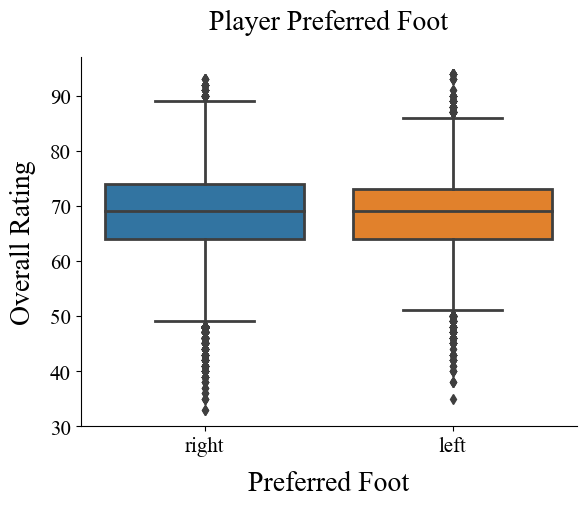

In [216]:
plt.rcParams.update(params)

sns.boxplot(x="PreferredFoot", y="OverallRating", data=players)

plt.xlabel("Preferred Foot")
plt.ylabel("Overall Rating")
plt.title("Player Preferred Foot", fontsize=size)
sns.despine()

### Section Summary
> * We clearly see that being dominant in one foot or another does not have much bearing on the overall rating of a player. 
> * However, the left-footers have slightly better overall ratings.

## Current and Potential Rating of Players

The visualization below shows a comparison between the current and potential overall rating of the players. 

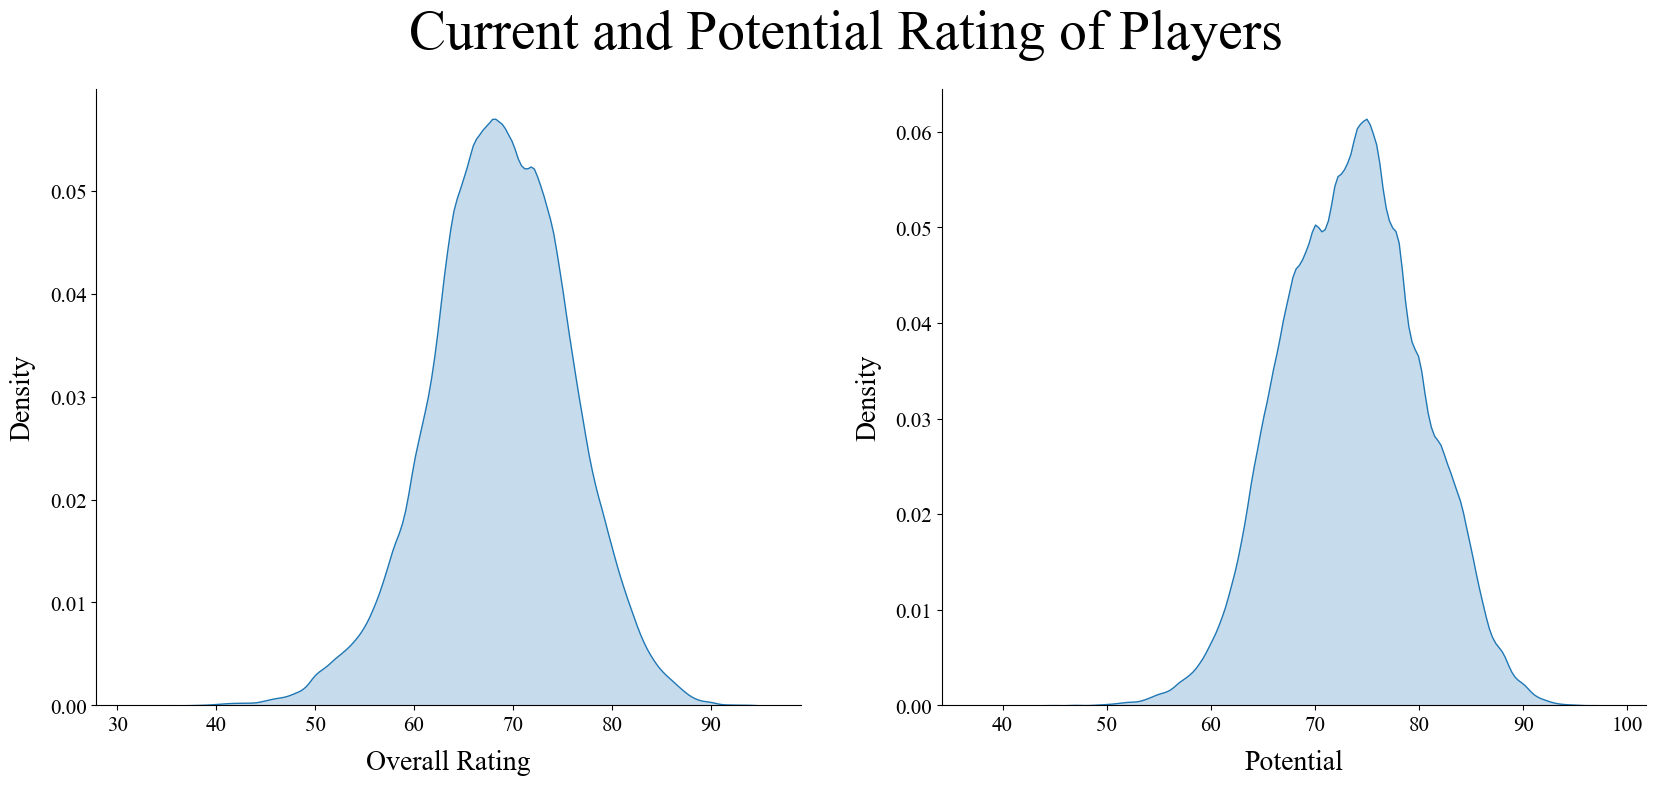

In [217]:
plt.rcParams.update(params)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

sns.kdeplot(data=players["OverallRating"], fill=True, legend=True, ax=ax1)
sns.kdeplot(data=players["Potential"], fill=True, legend=True, ax=ax2)

ax1.set_xlabel("Overall Rating")
ax2.set_xlabel("Potential")

plt.suptitle("Current and Potential Rating of Players", fontsize=size * 2)
sns.despine()

### Section Summary
> * There is very little difference between the Overall Rating and the Potential rating given to the players.
> * However, the players are usually rated with a higher future potential than their current overall rating.

## Attack and Defense Ratings of Players

The visualization below shows the attack and defense work rate of the players. 

In [218]:
players["AttackWorkRate"].value_counts()
allowed_values = ["high", "medium", "low"]
players.loc[~players["AttackWorkRate"].isin(allowed_values), "AttackWorkRate"] = np.nan

attack_values = players.groupby("AttackWorkRate")["PlayerID"].nunique()
attack_values = (
    attack_values.to_frame().reset_index().rename(columns={"PlayerID": "Count"})
)
attack_values = attack_values.sort_values("Count", ascending=False)

In [219]:
players["DefenceWorkRate"].value_counts()
allowed_values = ["high", "medium", "low"]
players.loc[
    ~players["DefenceWorkRate"].isin(allowed_values), "DefenceWorkRate"
] = np.nan

defence_values = players.groupby("DefenceWorkRate")["PlayerID"].nunique()
defence_values = (
    defence_values.to_frame().reset_index().rename(columns={"PlayerID": "Count"})
)
defence_values = defence_values.sort_values("Count", ascending=False)

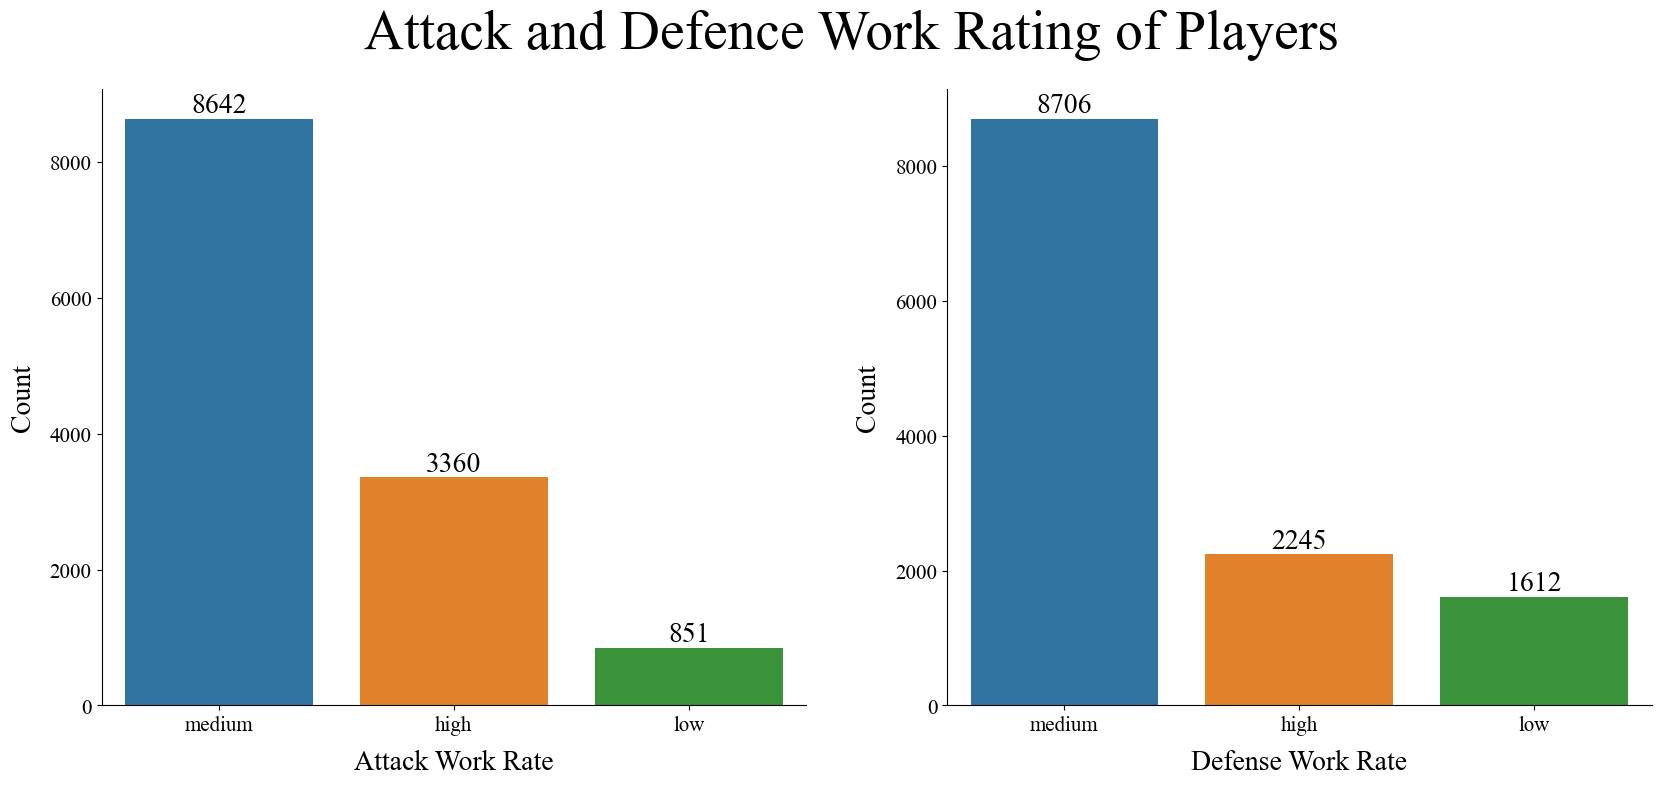

In [220]:
plt.rcParams.update(params)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

ax1 = sns.barplot(data=attack_values, x="AttackWorkRate", y="Count", ax = ax1)
ax2 = sns.barplot(data=defence_values, x="DefenceWorkRate", y="Count", ax = ax2)

ax1.set_xlabel("Attack Work Rate")
ax1.set_ylabel("Count")
ax1.bar_label(ax1.containers[0], size=size)

ax2.set_xlabel("Defense Work Rate")
ax2.set_ylabel("Count")
ax2.bar_label(ax2.containers[0], size=size)

plt.suptitle("Attack and Defence Work Rating of Players", fontsize=size * 2)
sns.despine()

### Section Summary
> * From the data, it seems that most players are rated at a medium level in both the Attack and Defense Work Rates.
> * Further analysis could indicate if the players who are rated at a certain category in the Attack Work Rate are usually rated in the same category in the Defense Work Rate. This analysis is beyond the scope of this report.

## Player Birth Years

The visualization below shows the year of birth of the players and therefore their age.

In [221]:
birthdays = players.groupby("Birthday")["PlayerID"].nunique()
birthdays = birthdays.to_frame().reset_index().rename(columns={"PlayerID": "Count"})

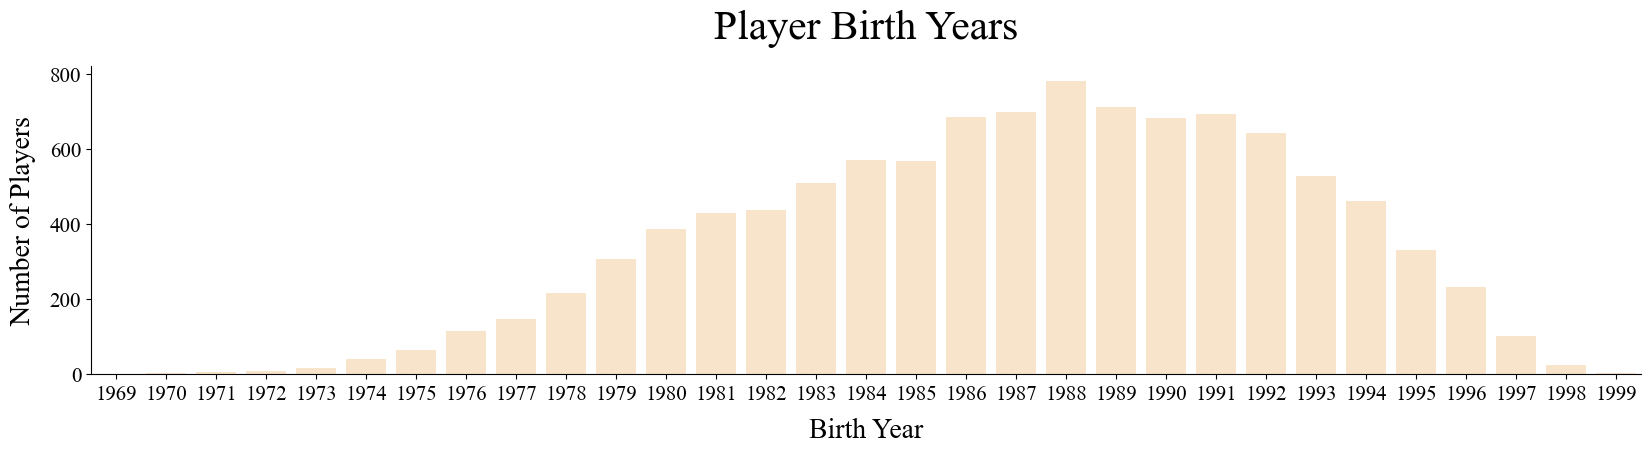

In [222]:
plt.rcParams.update(params)
fig, ax = plt.subplots(figsize=(20, 4))

sns.barplot(data=birthdays, x="Birthday", y="Count", color=color_1)

ax.set_xlabel('Birth Year')
ax.set_ylabel('Number of Players')
plt.title("Player Birth Years", fontsize=size * 1.5)
sns.despine()

### Section Summary
> * Looking at the in these dataframes, and the birth year of the players, it seems that most players were in their twenties when the data was collected.

## Height and Weight of the Players

The visualization below shows the Height and weight of the players.

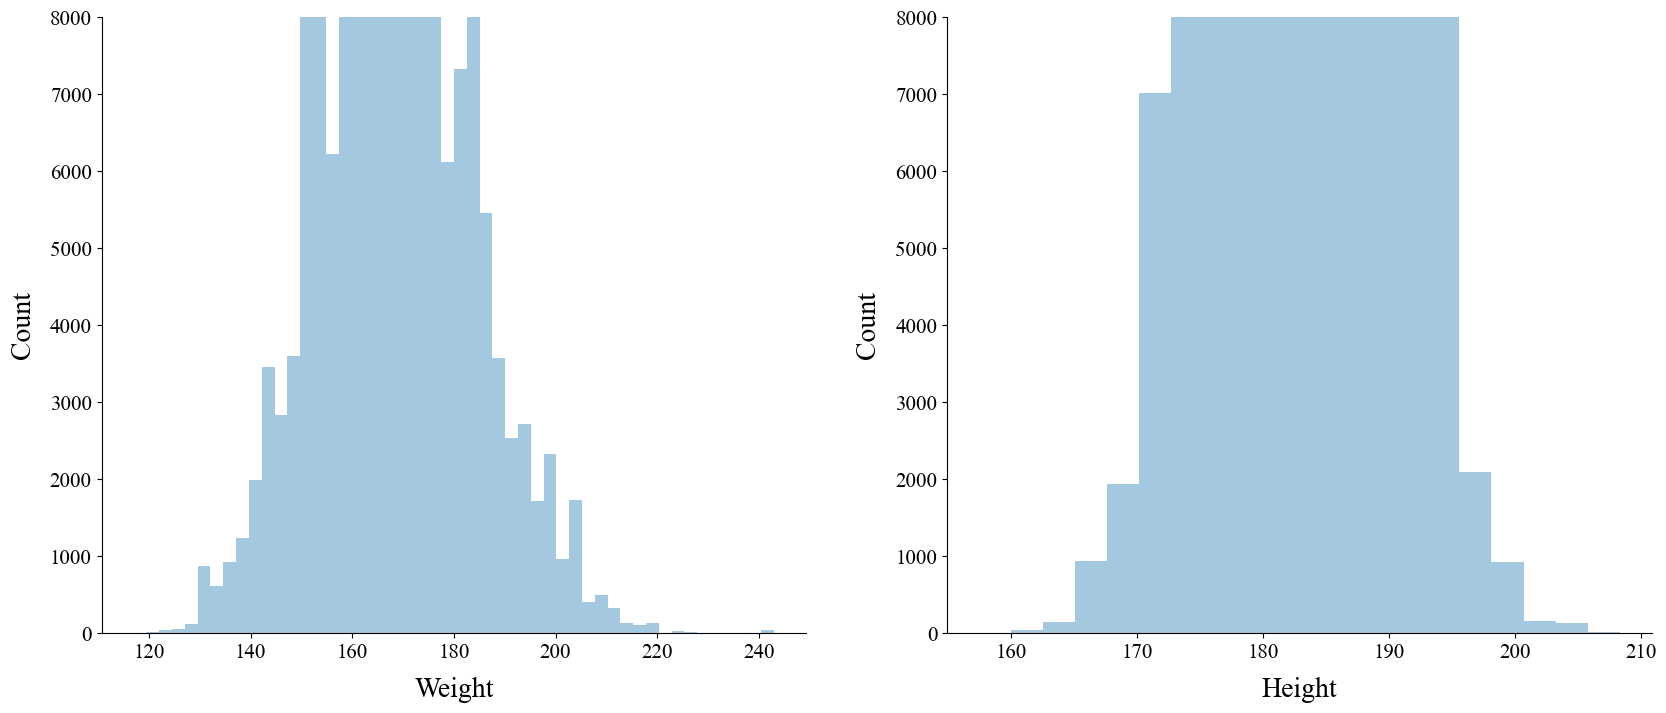

In [223]:
plt.rcParams.update(params)
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

sns.distplot(players["Weight"], kde=False, ax=axes[0])
axes[0].set(xlabel="Weight", ylabel="Count", ylim=(0, 8000))

sns.distplot(players["Height"], kde=False,  ax=axes[1], bins=20)
axes[1].set(xlabel="Height", ylabel="Count", ylim=(0, 8000))

sns.despine()

### Section Summary
> * From these visualization, we can surmise that most players are between 160 and 180 kg in weight. 
> * From these visualization, we can surmise that most players are between 175 and 190 cm in height. 

## Total Number of Goals Made at Home Games and Away Games

The visualization below shows the total number of goals made in games played at home in comparison to those played away from home.

In [224]:
goals = matches[["HomeGoal", "AwayGoal"]]
goals = goals.sum(numeric_only=True)
goals = goals.to_frame().reset_index().rename(columns={"index": "Goals", 0: "Count"})
goals

,Goals,Count
0,HomeGoal,28264
1,AwayGoal,21175


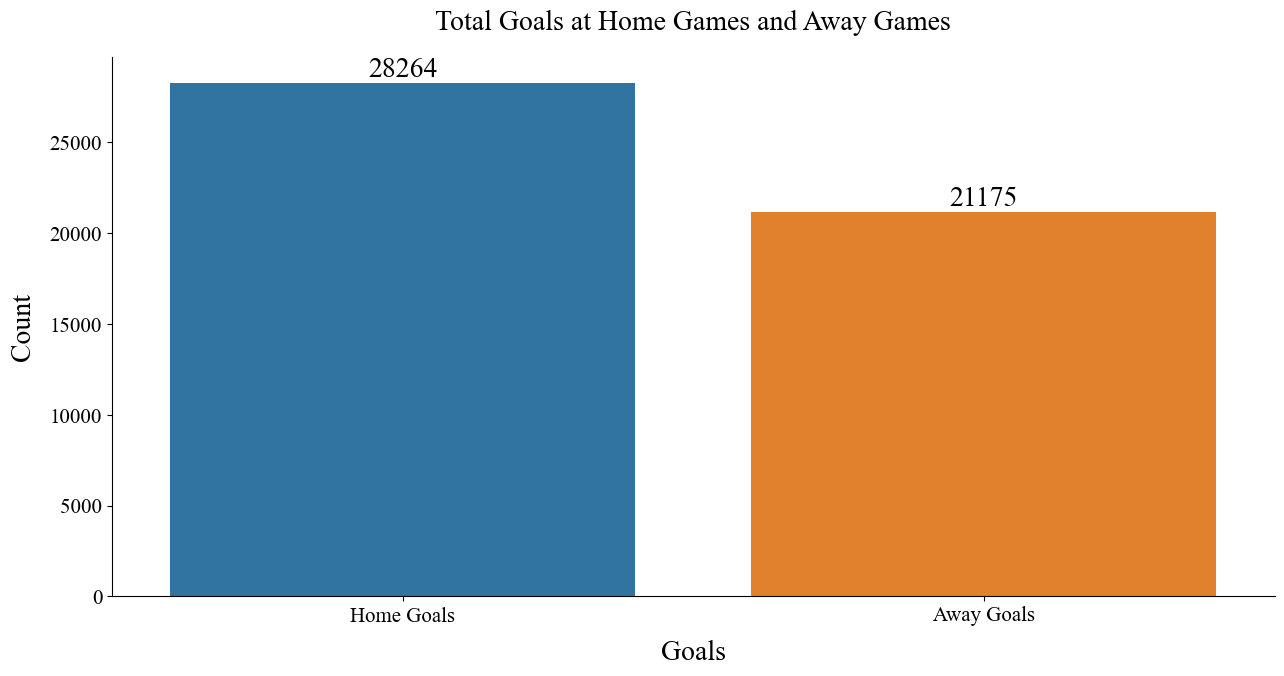

In [225]:
plt.rcParams.update(params)
fig, axes = plt.subplots(1, 1, figsize=(15, 7)) 

chart = sns.barplot(x="Goals", y="Count", data=goals, ax=axes)
chart.bar_label(chart.containers[0], size=size) 

chart.set_xticklabels(["Home Goals", "Away Goals"])
plt.title("Total Goals at Home Games and Away Games", fontsize=size)
sns.despine()

### Section Summary
> * More goals were made by the teams when they played at home.

## Total Goals by Season at Home and Away Games

The graph below depicts the total number of goals made in each season.

In [226]:
goals_season = matches[["Date", "HomeGoal", "AwayGoal"]].groupby(by="Date").sum()
goals_season = goals_season.rename(
    columns={"HomeGoal": "Home Goals", "AwayGoal": "Away Goals"}
)

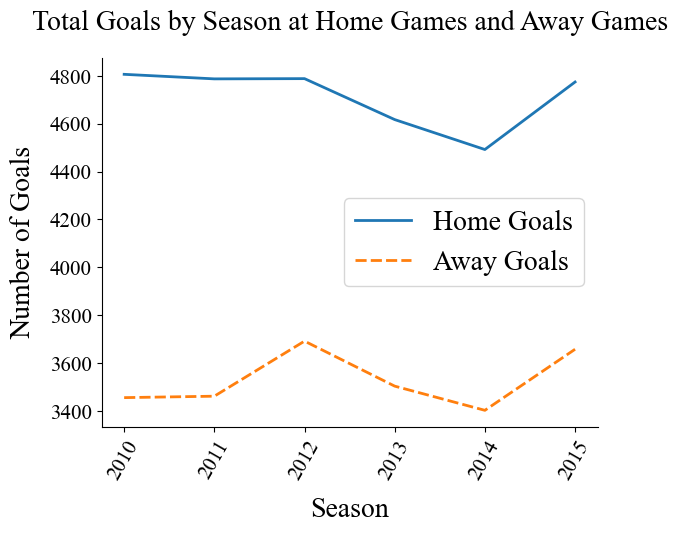

In [227]:
plt.rcParams.update(params)

sns.lineplot(data=goals_season)
plt.xticks(rotation=60)

labels = ["Away Goals", "Home Goals"]
plt.ylabel("Number of Goals")
plt.xlabel("Season")
plt.title("Total Goals by Season at Home Games and Away Games", fontsize=size)
sns.despine()

### Section Summary
> * In every season, the number of goals made by home teams were higher than by away teams.

## Leagues by Total Number of Wins

The graph below depicts orders the leagues by total number of wins.

In [228]:
league_most_wins = (
    matches.groupby("LeagueName")["Result"]
    .sum()
    .to_frame()
    .reset_index()
    .sort_values("Result", ascending=False)
)

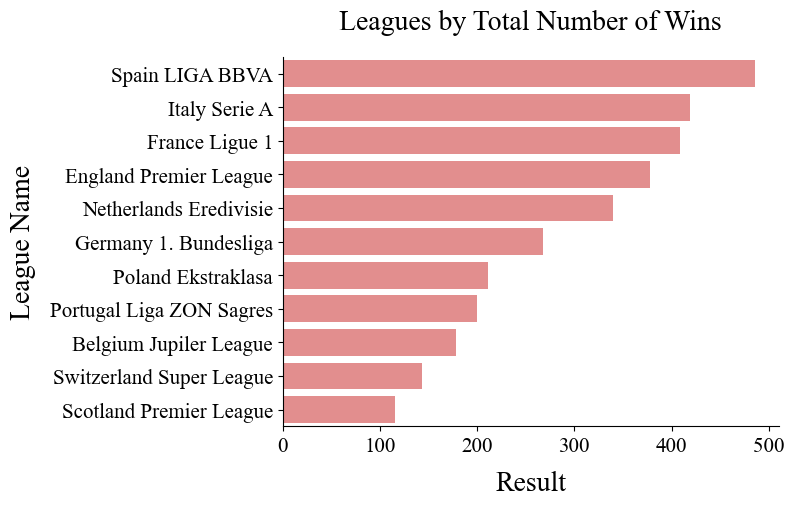

In [229]:
plt.rcParams.update(params)
fig, ax = plt.subplots()

sns.barplot(x="Result", y="LeagueName", data=league_most_wins, color=color_4)

ax.set_ylabel("League Name")
plt.title("Leagues by Total Number of Wins", fontsize=size)
sns.despine()

### Section Summary
> * League with the highest number of wins: Spain LIGA BBVA
> * League with the lowest number of wins: Scotland Premier League

## Top 10 Teams by Total Number of Wins

The graph below depicts the top 10 team with most wins.

In [230]:
team_most_wins = (
    matches.groupby("HomeTeamLongName")["Result"]
    .sum()
    .to_frame()
    .reset_index()
    .sort_values("Result", ascending=False)
)
team_most_wins = team_most_wins.head(10)

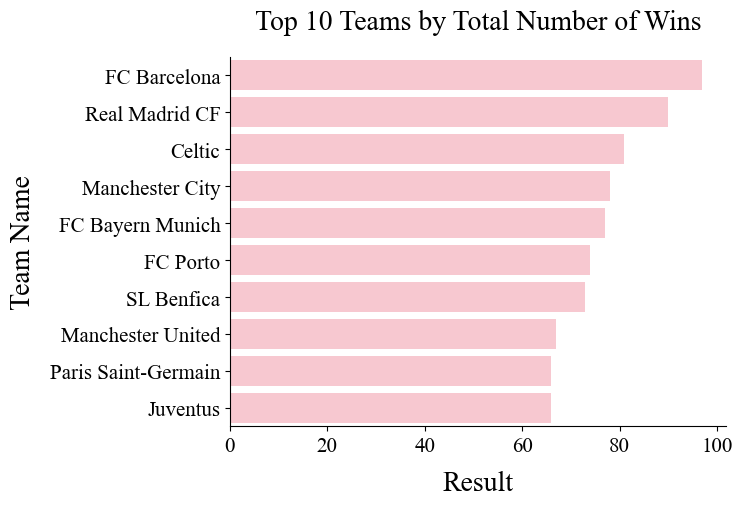

In [231]:
plt.rcParams.update(params)
fig, ax = plt.subplots()

sns.barplot(x="Result", y="HomeTeamLongName", data=team_most_wins, color=color_6)

ax.set_ylabel("Team Name")
plt.title("Top 10 Teams by Total Number of Wins", fontsize=size)
sns.despine()

### Section Summary
> * Team with the highest number of wins: FC Barcelona
> * Team with the lowest number of wins: Juventus

# Machine Learning

In this section we will see several machine learning models to predict the outcome of the matches. 

In [232]:
X = matches.loc[:, "HomePlayer1":"AwayDefenceTeamWidth"]
y = matches["Result"]

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, random_state=101)

In [234]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Logistic Regression

The section below shows a Logistic Regression model and its performance. 

In [236]:
lr = LogisticRegression(solver="saga", multi_class="ovr", max_iter=5000)

In [237]:
lr.fit(scaled_X_train, y_train);

In [238]:
y_predict = lr.predict(scaled_X_test)

In [239]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

          -1       0.49      0.52      0.50      1050
           0       0.15      0.00      0.01       933
           1       0.55      0.83      0.66      1666

    accuracy                           0.53      3649
   macro avg       0.40      0.45      0.39      3649
weighted avg       0.43      0.53      0.45      3649



In [240]:
eli.show_weights(lr, feature_names=X.columns.tolist())

### Section Summary
> * Results from this model:
    * Accuracy Score: 52
    * F1 Score Losses: 50
    * F1 Score Draws: 01
    * F1 Score Wins: 66
> * The overall accuracy score of the Logistic Regression model is just over 50%, which makes the model basically useless for predicting the outcome of the game. 
> * The F1 score for wins at 66, is comparable to the other models. 
> * The F1 score for losses at 50, is comparable to the other models. 
> * The F1 score for draws at 01, is among the lowest as compared to the other models.
> * There is no one feature or set of features that can give the best predictions. 

## Logistic Regression with Elastic Net Regularization

The section below shows a Logistic Regression model with Elastic Net Regularization and its performance. 

In [246]:
en = LogisticRegression(penalty='elasticnet', solver='saga', multi_class="ovr", max_iter=5000, l1_ratio=0.5, C=1)

In [247]:
en.fit(scaled_X_train, y_train);

In [248]:
y_predict = en.predict(scaled_X_test)

In [249]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

          -1       0.49      0.52      0.50      1050
           0       0.15      0.00      0.01       933
           1       0.55      0.82      0.66      1666

    accuracy                           0.53      3649
   macro avg       0.40      0.45      0.39      3649
weighted avg       0.43      0.53      0.45      3649



In [250]:
eli.show_weights(lr, feature_names=X.columns.tolist())

### Section Summary
> * Results from this model:
    * Accuracy Score: 53
    * F1 Score Losses: 50
    * F1 Score Draws: 01
    * F1 Score Wins: 66
> * The overall accuracy score of the Logistic Regression model is just over 53%, which makes the model basically useless for predicting the outcome of the game. 
> * The F1 score for wins at 66, is comparable to the other models. 
> * The F1 score for losses at 50, is comparable to the other models. 
> * The F1 score for draws at 01, is among the lowest as compared to the other models.
> * There is no one feature or set of features that can give the best predictions. 

## Decision Tree

In [251]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=3)
dtc = dtc.fit(scaled_X_train, y_train)
y_predict = dtc.predict(scaled_X_test)

In [252]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

          -1       0.43      0.21      0.28      1050
           0       0.00      0.00      0.00       933
           1       0.48      0.91      0.63      1666

    accuracy                           0.47      3649
   macro avg       0.30      0.37      0.30      3649
weighted avg       0.34      0.47      0.37      3649



In [253]:
eli.show_weights(dtc, feature_names=X.columns.tolist())

Weight,Feature
0.3726,HomePlayer8
0.3140,AwayPlayer8
0.1354,HomePlayer7
0.0749,AwayPlayer6
0.0530,AwayPlayer4
0.0355,HomeCross
0.0146,AwayCross
0,AwayPlayer10
0,AwayPlayer9
0,AwayPlayer7


### Section Summary
> * Accuracy Score: 47
> * F1 Score Losses: 28
> * F1 Score Draws: 00
> * F1 Score Wins: 63
> * The overall accuracy score of the Decision Tree model is 47, which makes the model basically useless for predicting the outcome of the game. 
> * The F1 score for wins at 63, is comparable to the other models. 
> * The F1 score for losses at 28, is among the lowest as compared to the other models.
> * The F1 score for draws at 0, is among the lowest as compared to the other models.
> * There is no one feature or set of features that can give the best predictions. 

## Random Forest

The section below shows a Random Forest model and its performance. 

In [254]:
rfc = RandomForestClassifier(n_estimators=10, max_features="sqrt", random_state=101)

In [255]:
rfc.fit(scaled_X_train, y_train)
y_predict = rfc.predict(scaled_X_test)

In [256]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

          -1       0.42      0.42      0.42      1050
           0       0.28      0.20      0.24       933
           1       0.55      0.64      0.59      1666

    accuracy                           0.46      3649
   macro avg       0.42      0.42      0.41      3649
weighted avg       0.44      0.46      0.45      3649



In [257]:
eli.show_weights(rfc, feature_names=X.columns.tolist())

Weight,Feature
0.0312 ± 0.0140,HomePlayer8
0.0274 ± 0.0142,HomePlayer11
0.0269 ± 0.0145,AwayPlayer6
0.0264 ± 0.0116,AwayPlayer8
0.0257 ± 0.0085,AwayPlayer11
0.0255 ± 0.0135,HomePlayer9
0.0254 ± 0.0078,HomePlayer7
0.0253 ± 0.0054,AwayPlayer4
0.0249 ± 0.0102,HomePlayer10
0.0249 ± 0.0052,HomePlayer4


### Section Summary
> * Accuracy Score: 45
    * F1 Score Losses: 42
    * F1 Score Draws: 21
    * F1 Score Wins: 57
> * The overall accuracy score of the Random Forest model is 45, which makes the model basically useless for predicting the outcome of the game.
> * The F1 score for wins at 57, which is lower than the other models. 
> * The F1 score for losses at 42, is comparable to the other models. 
> * The F1 score for draws at 21, is among the lowest as compared to the other models.
> * There is no one feature or set of features that can give the best predictions. 

## Random Forest with Grid Search

The section below shows a Random Forest model with Grid Search (for testing different hyperparameters) and its performance.

In [258]:
param_grid = {
    'n_estimators': [5, 15, 25],
    'max_features': [4, 14, 24],
    'oob_score': [True, False],
    'bootstrap': [True, False],
}

In [259]:
rfc = RandomForestClassifier(random_state=101)
grid = GridSearchCV(rfc, param_grid)

In [260]:
grid.fit(scaled_X_train, y_train);

In [261]:
grid.best_params_

{'bootstrap': True, 'max_features': 24, 'n_estimators': 25, 'oob_score': True}

In [262]:
rfc = RandomForestClassifier(
    bootstrap=True, max_features=24, n_estimators=25, oob_score=True
)

In [263]:
rfc.fit(scaled_X_train, y_train)
y_predict = rfc.predict(scaled_X_test)

In [264]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

          -1       0.43      0.41      0.42      1050
           0       0.28      0.14      0.18       933
           1       0.55      0.73      0.63      1666

    accuracy                           0.48      3649
   macro avg       0.42      0.42      0.41      3649
weighted avg       0.45      0.48      0.45      3649



In [265]:
eli.show_weights(rfc, feature_names=X.columns.tolist())

Weight,Feature
0.0320 ± 0.0145,HomePlayer8
0.0297 ± 0.0156,HomePlayer7
0.0294 ± 0.0121,AwayPlayer8
0.0281 ± 0.0112,HomePlayer11
0.0274 ± 0.0105,AwayPlayer6
0.0265 ± 0.0110,AwayPlayer9
0.0260 ± 0.0101,HomePlayer6
0.0259 ± 0.0098,AwayPlayer7
0.0258 ± 0.0123,AwayPlayer3
0.0256 ± 0.0111,AwayPlayer5


### Section Summary
> * Accuracy Score: 48
> * F1 Score Losses: 42
> * F1 Score Draws: 18
> * F1 Score Wins: 63
> * The overall accuracy score of the Random Forest model with grid search is 50, which makes the model basically useless for predicting the outcome of the game. 
> * The F1 score for wins at 63, is comparable to the other models. 
> * The F1 score for losses at 42, is comparable to the other models. 
> * The F1 score for draws at 18, is among the highest as compared to the other models.
> * There is no one feature or set of features that can give the best predictions. 

## Random Forest with Randomized Search

The section below shows a Random Forest model with Randomized Search (for testing different hyperparameters) and its performance.

In [266]:
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 4, 6],
    'bootstrap': [True, False],
}

In [267]:
rfc = RandomForestClassifier(random_state=101)

In [268]:
rscv = RandomizedSearchCV(rfc, param_distributions=param_dist, n_iter=20, cv=5, n_jobs=-1, random_state=1)

In [269]:
rscv.fit(scaled_X_train, y_train);

In [270]:
print("Best hyperparameters: ", rscv.best_params_)

Best hyperparameters:  {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 8, 'bootstrap': True}


In [271]:
rfc = RandomForestClassifier(
    bootstrap=True, min_samples_split=2, n_estimators=50, min_samples_leaf=1, max_depth=8)

In [272]:
rfc.fit(scaled_X_train, y_train)
y_predict = rfc.predict(scaled_X_test)

In [273]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

          -1       0.51      0.36      0.42      1050
           0       0.60      0.00      0.01       933
           1       0.51      0.89      0.65      1666

    accuracy                           0.51      3649
   macro avg       0.54      0.42      0.36      3649
weighted avg       0.53      0.51      0.42      3649



In [274]:
eli.show_weights(rfc, feature_names=X.columns.tolist())

Weight,Feature
0.0434 ± 0.0665,HomePlayer8
0.0423 ± 0.0805,HomePlayer7
0.0393 ± 0.0653,AwayPlayer3
0.0382 ± 0.0587,AwayPlayer5
0.0372 ± 0.0649,AwayPlayer7
0.0366 ± 0.0679,AwayPlayer9
0.0353 ± 0.0683,HomePlayer5
0.0352 ± 0.0693,HomePlayer3
0.0351 ± 0.0415,AwayPlayer4
0.0351 ± 0.0595,AwayPlayer10


### Section Summary
> * Accuracy Score: 51
> * F1 Score Losses: 42
> * F1 Score Draws: 01
> * F1 Score Wins: 65
> * The overall accuracy score of the Random Forest model with randomized search is 51, which makes the model basically useless for predicting the outcome of the game. 
> * The F1 score for wins at 65, is comparable to the other models. 
> * The F1 score for losses at 42, is comparable to the other models. 
> * The F1 score for draws at 01, is among the lowest as compared to the other models.
> * There is no one feature or set of features that can give the best predictions. 

## Support Vector Classification (SVC)

The section below shows a Support Vector Classification (SVC) model and its performance.

In [275]:
svc = SVC(kernel='rbf', decision_function_shape='ovr')

In [276]:
svc.fit(scaled_X_train, y_train);
y_predict = svc.predict(scaled_X_test)

In [ ]:
print(classification_report(y_test, y_predict))

### Section Summary
> * Accuracy Score: 53
> * F1 Score Losses: 47
> * F1 Score Draws: 6
> * F1 Score Wins: 66
> * The overall accuracy score of the SVC model is 53, which makes the model basically useless for predicting the outcome of the game. 
> * The F1 score for wins at 66, is comparable to the other models. 
> * The F1 score for losses at 47, is comparable to the other models. 
> * The F1 score for draws at 06, is among the lowest as compared to the other models.

##  Principle Component Analysis (PCA)

The section below shows a Principle Component Analysis(PCA) and its performance.

In [277]:
pipe = Pipeline([('pca', PCA(n_components=18)),
                 ('logistic', LogisticRegression(max_iter=10000))])

In [278]:
pipe.fit(scaled_X_train, y_train);

In [279]:
y_predict = pipe.predict(scaled_X_test)
score = pipe.score(X_test, y_test)

In [280]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

          -1       0.47      0.50      0.48      1050
           0       0.33      0.00      0.01       933
           1       0.55      0.83      0.66      1666

    accuracy                           0.52      3649
   macro avg       0.45      0.44      0.38      3649
weighted avg       0.47      0.52      0.44      3649



### Section Summary
> * Accuracy Score: 52
> * F1 Score Losses: 48
> * F1 Score Draws: 01
> * F1 Score Wins: 66
> * The overall accuracy score of the PCA model is 52, which makes the model basically useless for predicting the outcome of the game. 
> * The F1 score for wins at 66, is comparable to the other models. 
> * The F1 score for losses at 48, is comparable to the other models. 
> * The F1 score for draws at 01, is among the lowest as compared to the other models.  

# Conclusions

Here is a summary of the conclusions that may be drawn from this report. 

>* **The Analysis of the Data:** I reviewed nearly 200,000 data points related to the European football matches. <br> 
>* **The Goals:** The major goal of this analysis was to find a model that could predict the outcome of a match.
I utilized the 8 models listed below and the accuracy score of each model. 
    1. Logistic Regression: 52
    2. Logistic Regression with Elastic Net Regularization: 50
    3. Decision Tree: 47
    4. Random Forest: 45
    5. Random Forest with Grid Search: 50
    6. Random Forest with Randomized Search: 51
    7. Support Vector Classification (SVC): 53
    8. Principle Component Analysis (SVC): 52     <br> 
<br> 
>* **Overall Conclusion:** As can be seen by their performance analyses, none of the models I utilized in this report can be relied on to predict the outcome of a match.This analysis seems to indicate that it is not possible to adequately predict the outcome of a football match based on the data from the datasets I analyzed. Based on my analysis, I recommend against creating a business based on betting on such matches. <br> 

# Suggestions for Improvement

This report has certain weaknesses. In this section, I outlined those weaknesses and indicated some avenues for improvement. 

>* **Data on the Players:** Clear information about players in each team is not part of this data set. This is one of the major areas of improvement. <br>
>* **The Data Scientist:** It is best if the data scientist, has an adequate background knowledge on the topic of the analysis. I have no expertise in football. There may be parts of the data that I have overlooked that may have been most important and I may have given importance to parts of the data that may have had little significance.<br>
>* **Statistics:** I will continue to improve my statistical knowledge to create better analyses.<br>
>* **Pandas:** I will continue to learn to utilize more optimized Pandas techniques and algorithms.<br>
>* **Seaborn and Matplotlib:** I will continue to improve my knowledge of Seaborn and Matplotlib for creating visualizations. <br>
>* **Python Code:** I will continue to write better and more efficient Python code. <br>
>* **Clean Code:** I will continue to adhere to the principles of writing clean code. <br>
>* **Readability and Efficiency:** I will continue to improve my skills to find the delicate balance between readability and efficiency in coding.<br>